<a href="https://colab.research.google.com/github/ngochanh2306/PERSONAL_PROJECT/blob/main/DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the Libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error, confusion_matrix

LOADING PROCESSED DATASET

In [ ]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/nhanna1219/Closely_Customer_Classification/main/Preprocessed_Data.csv")
print("Number of datapoints:", len(df))
df

Number of datapoints: 2213


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Loyalty_Score,Is_Loyal
0,5.368107,-1.804778,-1.078759,-0.646435,-3.097021,0.337949,0.007753,0.821314,-0.411286,0.355576,...,0.493904,0.814431,-0.774570,0.656888,0.502650,0.688828,-1.420569,0.749187,0.405501,True
1,-3.491633,0.502507,-0.427520,-0.183056,0.859958,-0.916708,2.148626,0.386522,-0.610815,1.025348,...,0.453972,-0.146679,0.185969,0.007899,-0.298426,-0.227511,-0.257056,0.167572,0.190314,False
2,2.018019,-1.291695,-1.182698,-1.128659,0.603602,-0.583301,-0.137928,-0.128718,-0.429963,0.473263,...,-1.240771,0.170181,-0.554964,-0.661380,0.382996,0.297692,0.214487,-0.410894,0.380150,True
3,-3.286131,0.555640,-0.593547,-0.890906,0.937647,0.370995,-0.325239,0.343596,-0.994986,-0.007917,...,-0.242170,0.251216,-0.071301,-0.027513,0.068979,0.056725,-0.360599,-0.198887,0.234560,False
4,-0.585539,-1.463671,0.526403,2.031741,0.218226,0.454320,-0.106105,-0.749205,0.098400,-0.308995,...,0.156086,0.973668,-0.445877,0.238192,0.781415,-0.038416,-0.242535,-0.114447,0.161950,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2.517975,-2.138862,0.597105,-0.261319,0.287117,1.454556,-0.230066,1.349763,-0.798941,-1.439629,...,-0.675726,-1.440310,2.208240,0.187841,0.570606,0.674402,-0.863495,1.857402,0.368651,True
2209,-0.572000,0.107693,4.763979,0.798368,2.439081,0.086973,1.652409,-0.748219,0.592506,0.188656,...,-1.750092,2.701776,0.344741,-0.852533,-1.063754,0.413758,-0.767434,-0.096628,0.339637,True
2210,3.194354,1.378330,-0.705485,2.333412,-0.950679,-2.835620,-0.437002,0.709056,-0.728011,-0.501088,...,-0.640887,-1.276895,-1.341454,1.680951,-0.511617,0.604994,-0.196879,-1.370490,0.313276,True
2211,1.566489,-1.799049,0.414109,-1.856258,2.165313,-0.543326,0.460617,-0.247051,0.794085,-0.773861,...,-0.064015,-0.008221,0.129935,-0.087201,0.015821,0.195594,0.120479,-0.189465,0.443615,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PC1            2213 non-null   float64
 1   PC2            2213 non-null   float64
 2   PC3            2213 non-null   float64
 3   PC4            2213 non-null   float64
 4   PC5            2213 non-null   float64
 5   PC6            2213 non-null   float64
 6   PC7            2213 non-null   float64
 7   PC8            2213 non-null   float64
 8   PC9            2213 non-null   float64
 9   PC10           2213 non-null   float64
 10  PC11           2213 non-null   float64
 11  PC12           2213 non-null   float64
 12  PC13           2213 non-null   float64
 13  PC14           2213 non-null   float64
 14  PC15           2213 non-null   float64
 15  PC16           2213 non-null   float64
 16  PC17           2213 non-null   float64
 17  PC18           2213 non-null   float64
 18  PC19    

In [ ]:
X = df.iloc[:, :21]
y = df['Is_Loyal']

8-1-1

In [ ]:
# Tạo tập dữ liệu huấn luyện (80%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo tập dữ liệu kiểm định và kiểm thử (10% mỗi tập)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Hiển thị kích thước của các tập dữ liệu
print("Training set size:", len(X_train))
print("Validation set size:", len(X_validate))
print("Test set size:", len(X_test))

Training set size: 1770
Validation set size: 221
Test set size: 222


In [ ]:
# Khởi tạo mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Thiết lập các giá trị n_estimators để thử nghiệm từ 1 đến 500
param_grid = {'n_estimators': list(range(1, 501, 10))}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra giá trị tốt nhất của n_estimators
print("Best n_estimators:", grid_search.best_params_['n_estimators'])

Best n_estimators: 161


In [ ]:
# Huấn luyện lại mô hình trên toàn bộ tập huấn luyện (train + validate) với các tham số tốt nhất
rf_classifier = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)
rf_classifier.fit(pd.concat([X_train, X_validate]), pd.concat([y_train, y_validate]))


RandomForestClassifier(n_estimators=161, random_state=42)

In [ ]:
# Đánh giá mô hình trên tập kiểm định
predictions_validate = best_rf_classifier.predict(X_validate)
accuracy_validate = accuracy_score(y_validate, predictions_validate)
print(f"Accuracy on Validation Set: {accuracy_validate}")

Accuracy on Validation Set: 0.9592760180995475


In [ ]:
# Đánh giá mô hình trên tập kiểm thử
predictions_test = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on Test Set: {accuracy_test}")

Accuracy on Test Set: 0.963963963963964


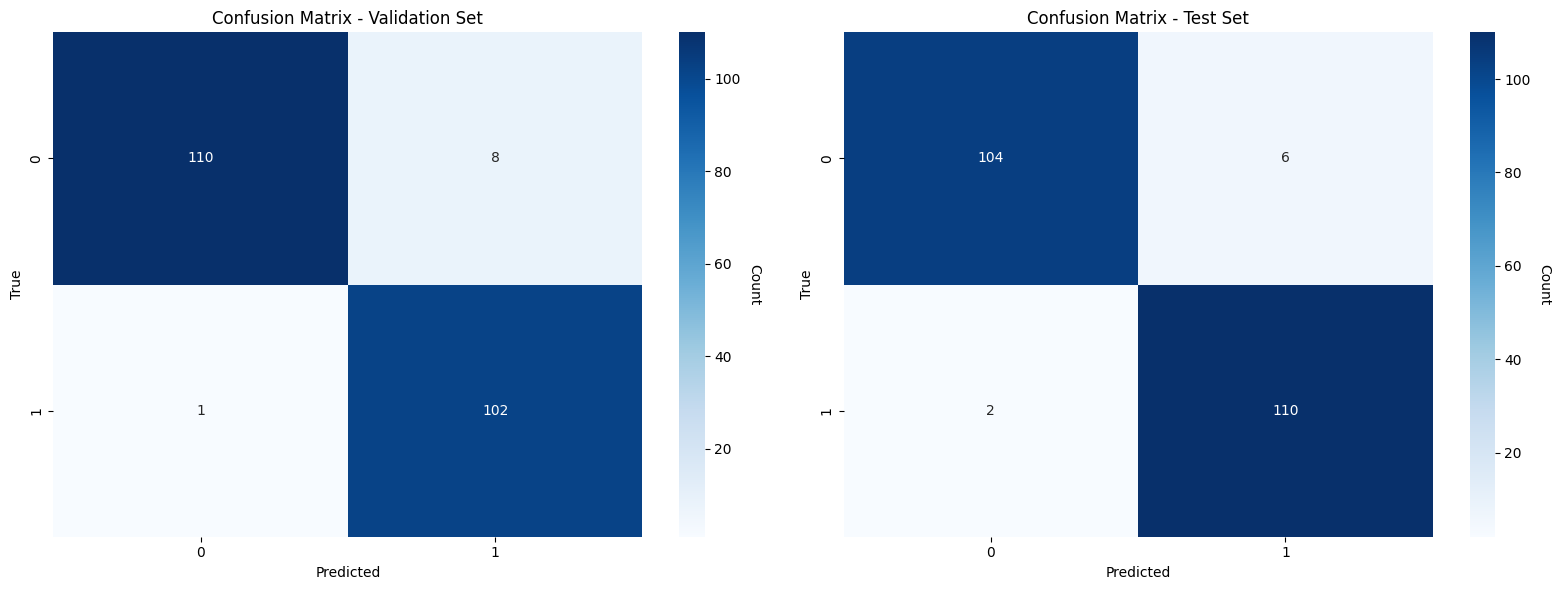

In [ ]:
# Tính ma trận nhầm lẫn trên tập kiểm định
conf_matrix_validate = confusion_matrix(y_validate, predictions_validate)
# Hiển thị ma trận nhầm lẫn của tập kiểm định bằng heatmap với color bar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
heatmap_validate = sns.heatmap(conf_matrix_validate, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')

# Hiển thị color bar bên phải
cbar_validate = heatmap_validate.collections[0].colorbar
cbar_validate.set_label('Count', rotation=270, labelpad=15)

# Tính ma trận nhầm lẫn trên tập kiểm thử
conf_matrix_test = confusion_matrix(y_test, predictions_test)
# Hiển thị ma trận nhầm lẫn của tập kiểm thử bằng heatmap với color bar
plt.subplot(1, 2, 2)
heatmap_test = sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Hiển thị color bar bên phải
cbar_test = heatmap_test.collections[0].colorbar
cbar_test.set_label('Count', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

In [ ]:
# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal = accuracy_score(y_test, predictions_test)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal}")

# Tính các độ đo khác
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
f1 = f1_score(y_test, predictions_test)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# In classification report
class_report = classification_report(y_test, predictions_test)
print("Classification Report:\n", class_report)

Accuracy compared with 'Is_Loyal' column: 0.963963963963964
Precision: 0.9482758620689655
Recall: 0.9821428571428571
F1 Score: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.95      0.96       110
        True       0.95      0.98      0.96       112

    accuracy                           0.96       222
   macro avg       0.96      0.96      0.96       222
weighted avg       0.96      0.96      0.96       222



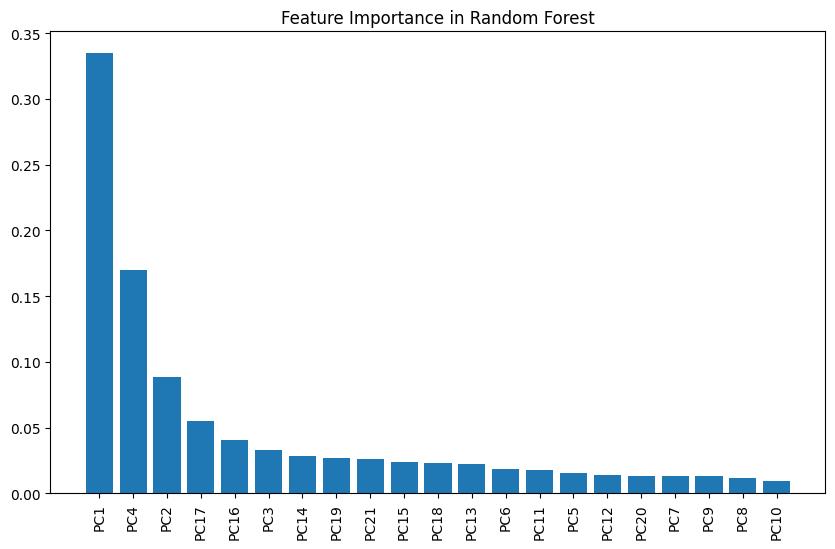

In [ ]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Random Forest
feature_importances = grid_search.best_estimator_.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices = feature_importances.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()

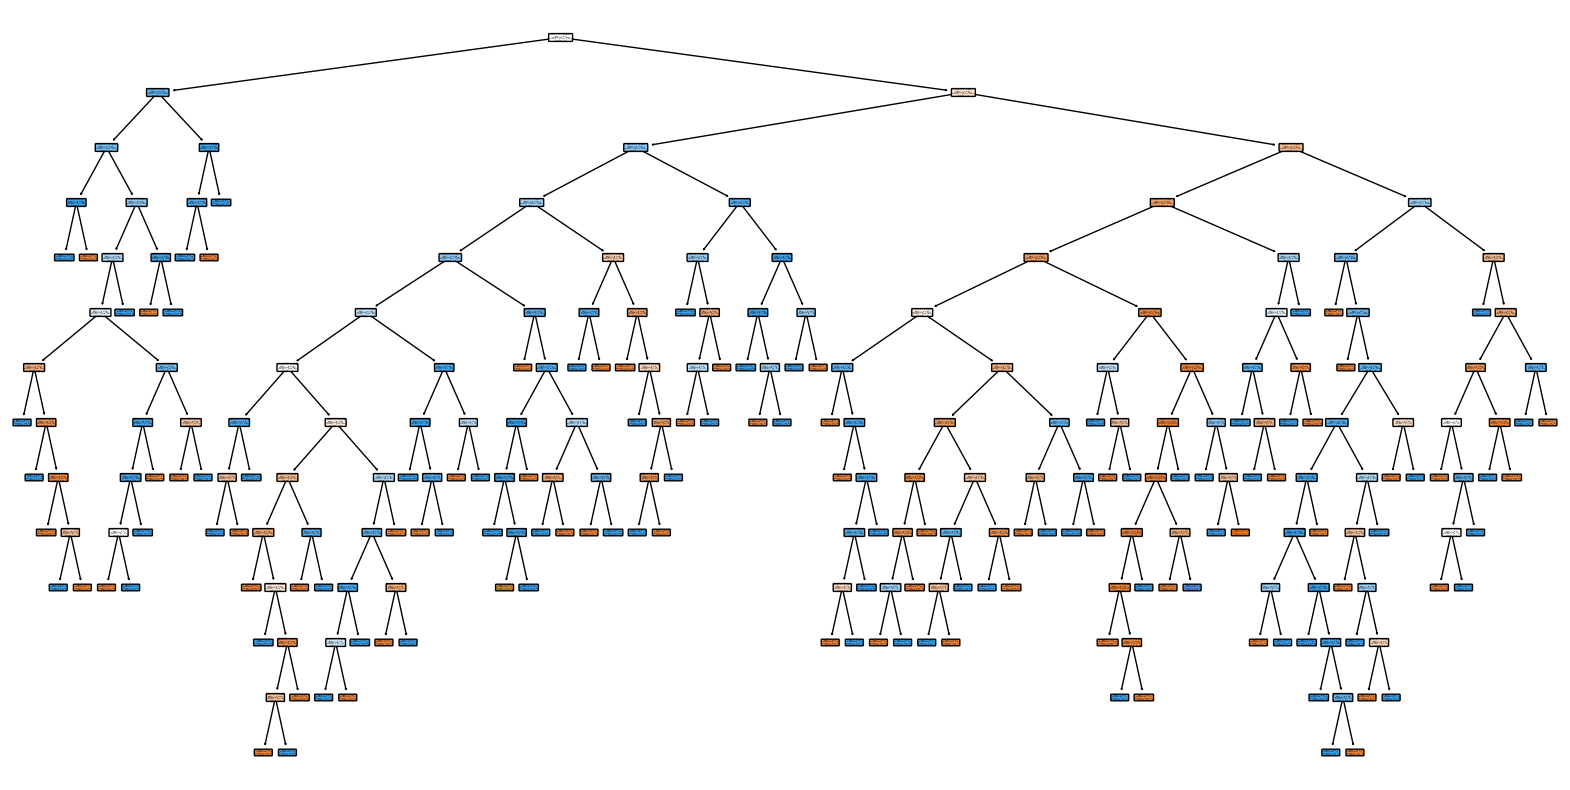

In [ ]:
from sklearn.tree import plot_tree

# Lấy ra cây quyết định đầu tiên từ mô hình Random Forest
first_tree = grid_search.best_estimator_.estimators_[0]

# Vẽ biểu đồ của cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=feature_names, filled=True, rounded=True, class_names=['0', '1'])
plt.show()

In [ ]:
filename = "random_forest_811.pickle"

In [ ]:
pickle.dump(rf_classifier, open(filename, "wb"))

In [ ]:
rf_811_model = pickle.load(open(filename, "rb"))

7-2-1

In [ ]:
# Tạo tập dữ liệu huấn luyện (70%)
X_train_new, X_temp_new, y_train_new, y_temp_new = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo tập dữ liệu kiểm định (20%)
X_validate_new, X_test_new, y_validate_new, y_test_new = train_test_split(X_temp_new, y_temp_new, test_size=2/3, random_state=42)

# Hiển thị kích thước của các tập dữ liệu
print("Training set size:", len(X_train_new))
print("Validation set size:", len(X_validate_new))
print("Test set size:", len(X_test_new))


Training set size: 1549
Validation set size: 221
Test set size: 443


In [ ]:
# Khởi tạo mô hình Random Forest
rf_classifier_new = RandomForestClassifier(random_state=42)

# Thiết lập các giá trị n_estimators để thử nghiệm từ 1 đến 500
param_grid_new = {'n_estimators': list(range(1, 501, 10))}

# Sử dụng GridSearchCV để tìm giá trị tốt nhất trên tập train và validate
grid_search_new = GridSearchCV(rf_classifier_new, param_grid_new, cv=5, scoring='accuracy')
grid_search_new.fit(X_train_new, y_train_new)

# In ra giá trị tốt nhất của n_estimators
print("Best n_estimators:", grid_search_new.best_params_['n_estimators'])

Best n_estimators: 31


In [ ]:
best_rf_classifier_new = RandomForestClassifier(n_estimators=grid_search_new.best_params_['n_estimators'], random_state=42)
best_rf_classifier_new.fit(pd.concat([X_train_new, X_validate_new]), pd.concat([y_train_new, y_validate_new]))


RandomForestClassifier(n_estimators=31, random_state=42)

In [ ]:
# Đánh giá mô hình trên tập kiểm định
predictions_validate_new = best_rf_classifier_new.predict(X_validate_new)
accuracy_validate_new = accuracy_score(y_validate_new, predictions_validate_new)
print(f"Accuracy on Validation Set: {accuracy_validate_new}")

Accuracy on Validation Set: 1.0


In [ ]:
# Đánh giá mô hình trên tập kiểm thử
predictions_test_new = best_rf_classifier_new.predict(X_test_new)
accuracy_test_new = accuracy_score(y_test_new, predictions_test_new)
print(f"Accuracy on Test Set: {accuracy_test_new}")

Accuracy on Test Set: 0.945823927765237


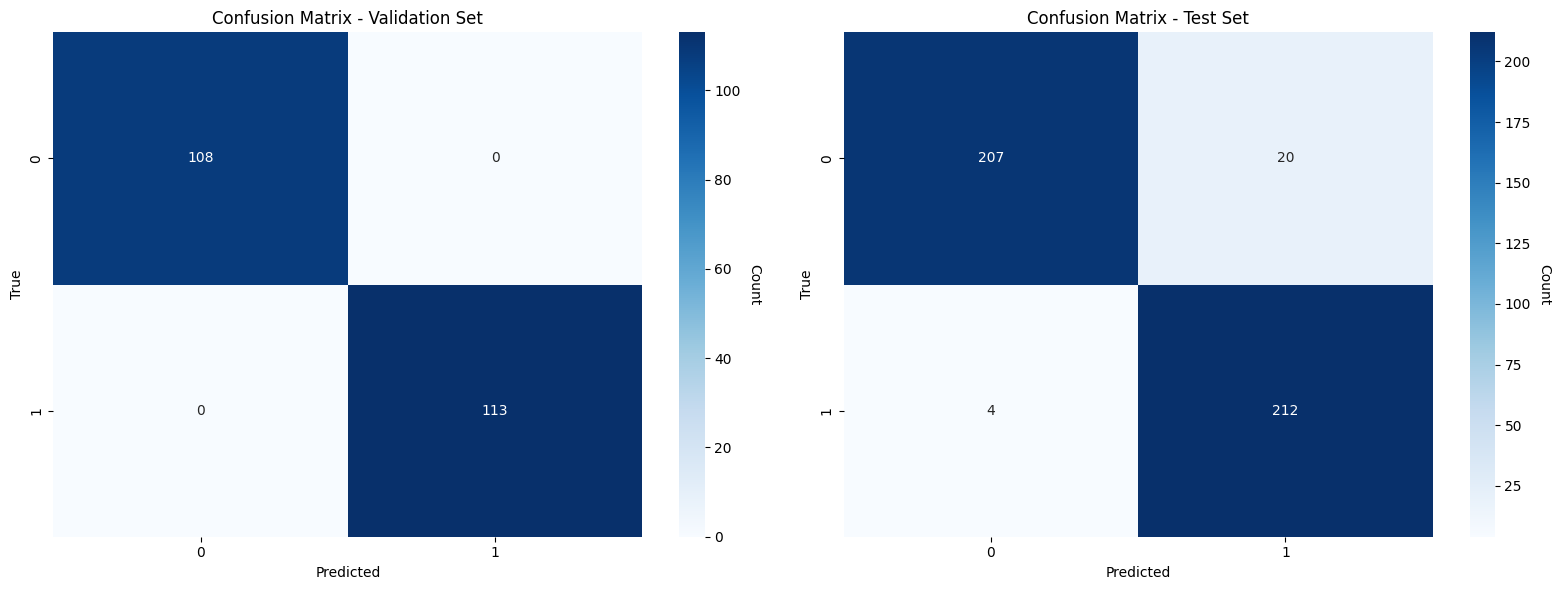

In [ ]:
# Tính ma trận nhầm lẫn trên tập kiểm định
conf_matrix_validate_new = confusion_matrix(y_validate_new, predictions_validate_new)
# Hiển thị ma trận nhầm lẫn của tập kiểm định bằng heatmap với color bar
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
heatmap_validate_new = sns.heatmap(conf_matrix_validate_new, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Validation Set')

# Hiển thị color bar bên phải
cbar_validate_new = heatmap_validate_new.collections[0].colorbar
cbar_validate_new.set_label('Count', rotation=270, labelpad=15)

# Tính ma trận nhầm lẫn trên tập kiểm thử
conf_matrix_test_new = confusion_matrix(y_test_new, predictions_test_new)
# Hiển thị ma trận nhầm lẫn của tập kiểm thử bằng heatmap với color bar
plt.subplot(1, 2, 2)
heatmap_test_new = sns.heatmap(conf_matrix_test_new, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Hiển thị color bar bên phải
cbar_test_new = heatmap_test_new.collections[0].colorbar
cbar_test_new.set_label('Count', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


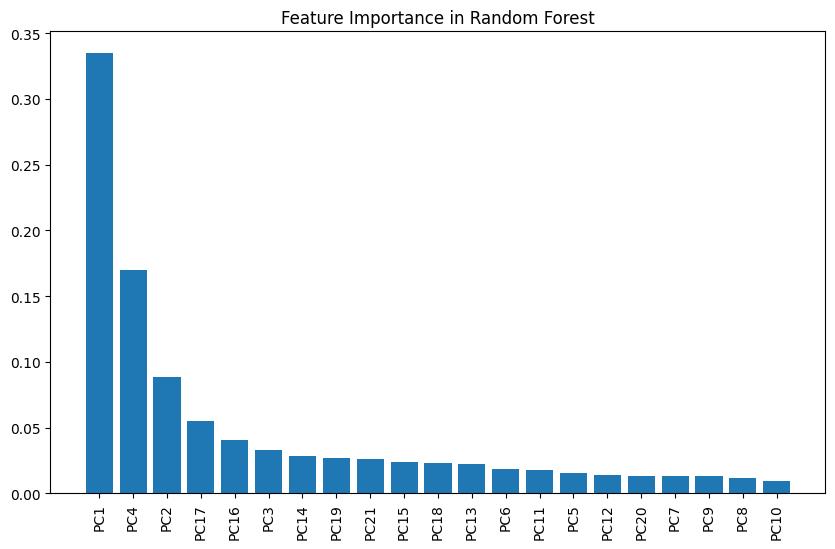

Accuracy compared with 'Is_Loyal' column: 0.945823927765237
Precision: 0.9137931034482759
Recall: 0.9814814814814815
F1 Score: 0.9464285714285714
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.91      0.95       227
        True       0.91      0.98      0.95       216

    accuracy                           0.95       443
   macro avg       0.95      0.95      0.95       443
weighted avg       0.95      0.95      0.95       443



In [ ]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Random Forest
feature_importances_new = grid_search_new.best_estimator_.feature_importances_

# Lấy tên của các đặc trưng
feature_names_new = X_train_new.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices_new = feature_importances_new.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_new.shape[1]), feature_importances_new[indices_new])
plt.xticks(range(X_train_new.shape[1]), feature_names_new[indices_new], rotation=90)
plt.title('Feature Importance in Random Forest')
plt.show()

# Đánh giá độ chính xác so với cột 'Is_Loyal'
accuracy_with_is_loyal_new = accuracy_score(y_test_new, predictions_test_new)
print(f"Accuracy compared with 'Is_Loyal' column: {accuracy_with_is_loyal_new}")

# Tính các độ đo khác
precision_new = precision_score(y_test_new, predictions_test_new)
recall_new = recall_score(y_test_new, predictions_test_new)
f1_new = f1_score(y_test_new, predictions_test_new)

print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1 Score: {f1_new}")

# In classification report
class_report_new = classification_report(y_test_new, predictions_test_new)
print("Classification Report:\n", class_report_new)


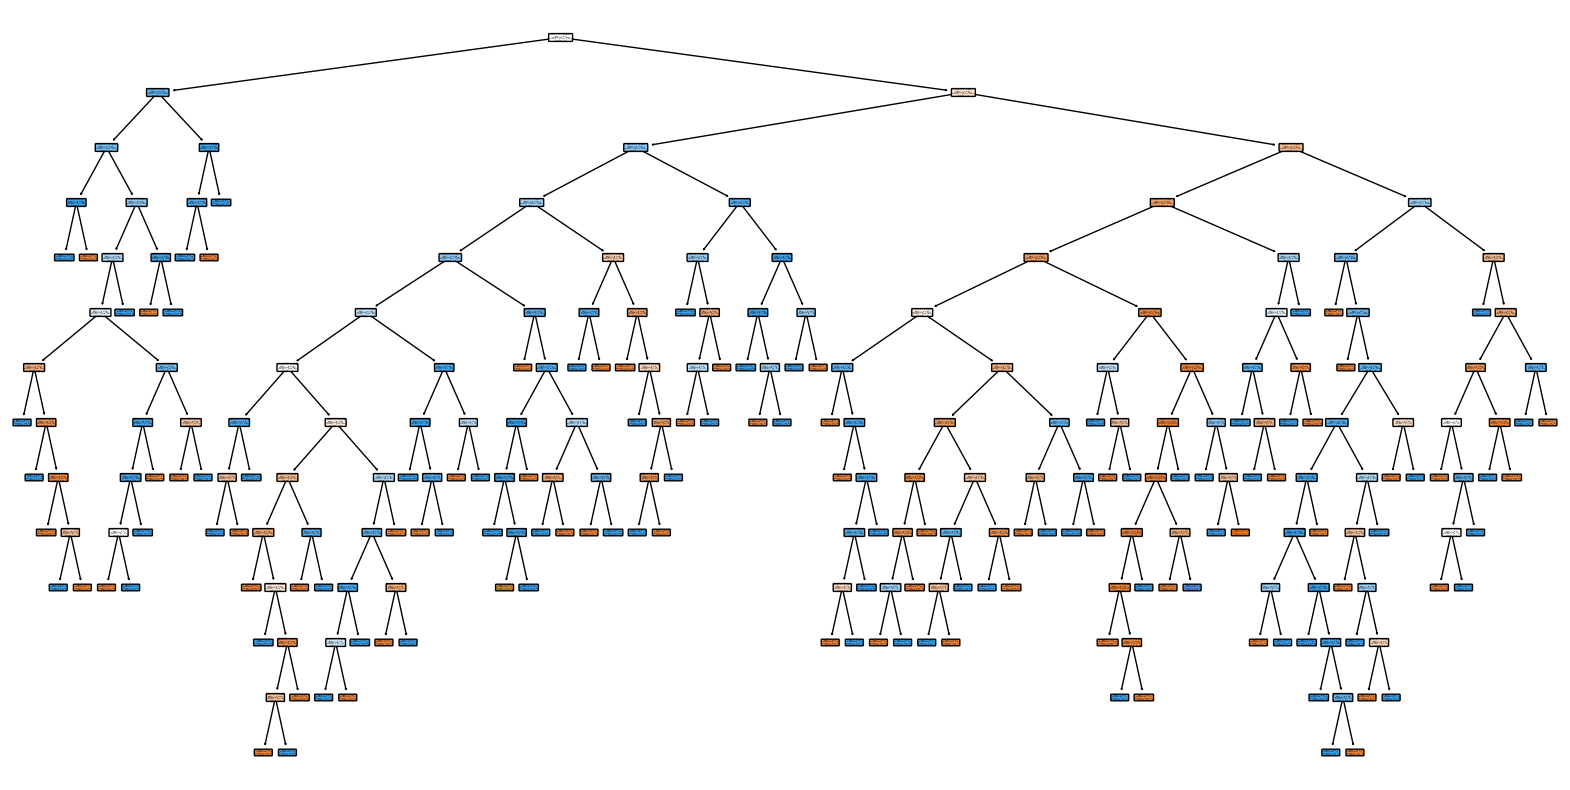

In [ ]:
from sklearn.tree import plot_tree

# Lấy ra cây quyết định đầu tiên từ mô hình Random Forest
first_tree_new = grid_search_new.best_estimator_.estimators_[0]

# Vẽ biểu đồ của cây quyết định
plt.figure(figsize=(20, 10))
plot_tree(first_tree_new, feature_names=feature_names_new, filled=True, rounded=True, class_names=['0', '1'])
plt.show()


In [ ]:
filename2 = "random_forest_721.pickle"

In [ ]:
pickle.dump(rf_classifier_new, open(filename2, "wb"))

In [ ]:
rf_721_model = pickle.load(open(filename2, "rb"))